# Caminatas aleatorias
#### Alberto Benavides
#### 11 de marzo de 2021


Una caminata aleatoria unidimensional es una secuencia de $n \in \mathbb{N}$ pasos a partir de una posición inicial $o$ con dirección aleatoria $x = \{-1, 1\}$ que realiza un agente con probabilidades $p, q$ tal que $p + q = 1$ para cada dirección, respectivamente.

Enseguida, se muestra un ejemplo de cien caminatas de $n = 100$ pasos y $p = q = 1/2$ con posición inicial $o = 0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

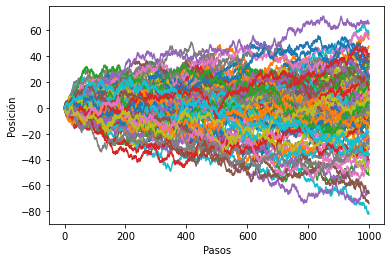

In [5]:
n = 1000
plt.figure()
pos = []
pos_finales = []
for i in range(100):
    t = np.random.randint(2, size= n)
    t = (t * 2) -1
    plt.plot(range(n), np.cumsum(t))
    pos.append(np.cumsum(t))
    pos_finales.append(sum(t))
plt.xlabel('Pasos')
plt.ylabel('Posición')
plt.show()

A partir de esta visualización se puede intuir que la **media** $\mu$ de la posición final en esos cien pasos se acerca a cero, lo cual resulta más claro con un diagrama de cajas y bigotes.

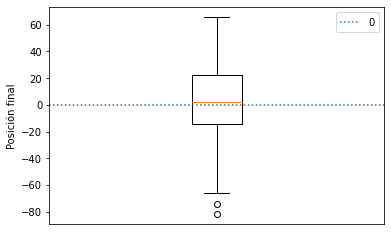

In [6]:
plt.figure()
plt.boxplot(pos_finales)
plt.ylabel('Posición final')
plt.xticks([])
plt.axhline(0, label="$0$", linestyle=":")
plt.legend()
plt.show()

Además, con un histograma se pueden mostrar las posiciones que han recorrido esas caminatas en las iteraciones mencionadas y constatar que la mayoría rodan la posición inicial $o = 0$.

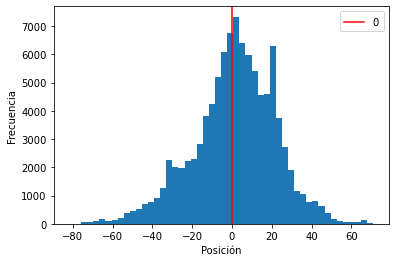

In [7]:
# https://stackoverflow.com/a/33718947
t = np.concatenate(pos).ravel().tolist()

plt.figure()
plt.hist(t, bins=50)
plt.ylabel('Frecuencia')
plt.xlabel('Posición')
plt.axvline(0, label="$0$", c='r')
plt.legend()
plt.show()

Por otro lado, se pueden calcular numéricamente la media y varianza. Para ello, basta recordar que $p$ es la probabilidad de moverse en la dirección $x = 1$ mientras $q = 1 - p$ es la probabilidad de ir en la dirección $x = -1$, así que el valor esperado de un paso cualquiera $x_i$ es
$$E(x_i) = (1)p + (-1)(1 - p) = 2p - 1 .$$

Esto se puede extender a $n$ pasos para conocer el valor esperado $E$ de la posición final $y$, esto es
$$E(y) = \sum_i^n E(x_i) = n (2p-1) .$$

La varianza $V$ de cada paso $x_i$ se calcula así
$$V(x_i) E(x_i^2) = (1)^2p + (-1)^2(1-p) = 1, $$
y de ella es posible obtener la varianza de la posición final $y$ con
$$V(y) = \sum_i^n [E(x_i^2) - E(x_i)^2] = n [1 - (2p - 1)^2] = |-4np (p - 1)|. $$

A partir de esto, se puede explorar el espacio de probabilidades de caminatas aleatorias con distintas probabilidades y plasmar en distribuciones de probabilidad gaussianas sus resultados. Una exploración computacional de este espacio en probabilidades de $p = \{5, 10, 15, \ldots, 95\}$ para $n = 10$ pasos se muestra a continuación.

In [16]:
from scipy import stats

from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

# https://stackoverflow.com/a/38219022
colors = plt.cm.tab20(np.linspace(0,1,21))

Text(0.5, 0, 'Media')

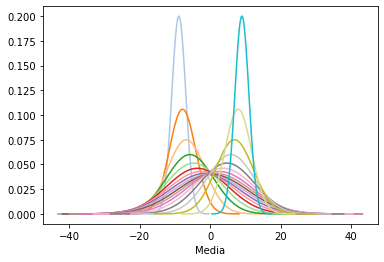

In [21]:
# m, s = 0, 0.1
plt.figure()
finales = []
n = 10
vars = []
for a in np.linspace(0, 100, 20):
    p = a / 100
    m = n * (2 * p - 1)
    s = 4 * n * p * (1 - p)
    normal = stats.norm(m, s)
    x = np.linspace(normal.ppf(0.00001),normal.ppf(0.99999), 100)
    plt.plot(x, normal.pdf(x), c=colors[int(a / 5)])
    # plt.plot(x, 1/(s * np.sqrt(2 * np.pi)) * np.exp( - (x - m)**2 / (2 * s**2)))
    vars.append(s)
plt.xlabel('Media')

Como puede observarse, el valor esperado se concentra en $0$ para probabilidades que rondan $1/2$, mientras que las cercanas a $0$ y $1$ tienden a infinito. Lo cual también podría explicarse por el hecho de que, cercanas a las probabilidades de $0$ y $1$ la varianza también se hace cero.

Text(0.5, 0, 'Probabilidad')

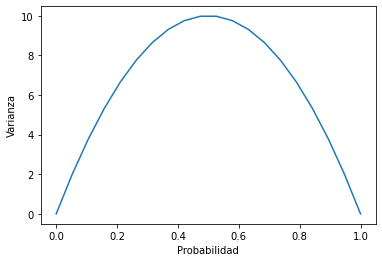

In [23]:
plt.figure()
plt.plot(np.linspace(0, 1, 20), vars)
plt.ylabel('Varianza')
plt.xlabel('Probabilidad')